In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Load the dataset
df = pd.read_csv('Roman_Urdu_Toxic.csv', encoding='latin-1')
df.head()

,Comments,T\NT
0,Tum jaise log sab kuch kharab kar dete hain.,NT
1,Mujhe bahat khushi hay kah mere waldin ne meri...,NT
2,Tum sirf likes aur views ke liye ho yahan.Tumh...,T
3,Tum bohot bewakoof ho.,T
4,"Jao yahan se, tumhara koi kaam nahi.",NT


In [30]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Comments    0
T\NT        0
dtype: int64


In [31]:
# Function to preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Apply preprocessing
df['Comments'] = df['Comments'].apply(preprocess_text)

# Encode labels
df['Toxic'] = df[r'T\NT'].apply(lambda x: 1 if x == 'T' else 0)
df['Non-Toxic'] = df[r'T\NT'].apply(lambda x: 1 if x == 'NT' else 0)

# Drop the original TNT column
df.drop(columns=[r'T\NT'], inplace=True)

# Display the first few rows of the preprocessed dataframe
df.head()


,Comments,Toxic,Non-Toxic
0,tum jaise log sab kuch kharab kar dete hain.,0,1
1,mujhe bahat khushi hay kah mere waldin ne meri...,0,1
2,tum sirf likes aur views ke liye ho yahan.tumh...,1,0
3,tum bohot bewakoof ho.,1,0
4,"jao yahan se, tumhara koi kaam nahi.",0,1


In [32]:
# Define stop words removal function
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply the function to remove stop words from the 'Comments' column
df['Comments'] = df['Comments'].apply(remove_stopwords)


In [33]:
duplicates = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicates)

df_cleaned = df.drop_duplicates()

print("DataFrame after removing duplicates:")
print(df_cleaned)

Duplicate Rows:
                                               Comments  Toxic  Non-Toxic
292   "america mein kisi ko bhi tameez nahi hai, boh...      0          1
293   america murda baad. lanat called humanitarians...      0          1
2183           es jaisi lanti orat ko kia parwa logo ki      1          0
2518        fazool shirt fazool print kabhi na kharidna      1          0
2798        fazool shirt fazool print kabhi na kharidna      1          0
3444                                   ghatiya k bachay      1          0
3531                              bilkul fazoooool hain      1          0
3532                        mujhe fb se nafrat hai ye b      1          0
3535             india kabhi hamara dost nahi ban sakta      1          0
3537                       wo kya khaaak rang laai gi,,      1          0
DataFrame after removing duplicates:
                                               Comments  Toxic  Non-Toxic
0          tum jaise log sab kuch kharab kar dete hain.    

In [34]:
# Normalize the numerical features in the dataset
scaler = StandardScaler()

# Assuming 'Comments_Length' is a numerical feature we want to normalize
df['Comments_Length'] = df['Comments'].str.len()
df['Comments_Length'] = scaler.fit_transform(df[['Comments_Length']])

# Display the normalized dataframe
print("DataFrame after normalization:")
print(df.head())


DataFrame after normalization:
                                            Comments  Toxic  Non-Toxic  \
0       tum jaise log sab kuch kharab kar dete hain.      0          1   
1  mujhe bahat khushi hay kah mere waldin ne meri...      0          1   
2  tum sirf likes aur views ke liye ho yahan.tumh...      1          0   
3                             tum bohot bewakoof ho.      1          0   
4               jao yahan se, tumhara koi kaam nahi.      0          1   

   Comments_Length  
0        -0.192269  
1         2.087297  
2         0.610395  
3        -0.898614  
4        -0.449122  


In [35]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers in the 'Comments_Length' column
df = remove_outliers(df, 'Comments_Length')

# Display the dataframe after removing outliers
print("DataFrame after removing outliers:")
print(df.head())


DataFrame after removing outliers:
                                            Comments  Toxic  Non-Toxic  \
0       tum jaise log sab kuch kharab kar dete hain.      0          1   
2  tum sirf likes aur views ke liye ho yahan.tumh...      1          0   
3                             tum bohot bewakoof ho.      1          0   
4               jao yahan se, tumhara koi kaam nahi.      0          1   
6  tum se na ho payega. tumhein kuch seekhne ki z...      0          1   

   Comments_Length  
0        -0.192269  
2         0.610395  
3        -0.898614  
4        -0.449122  
6         0.257223  


In [36]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Comments           0
Toxic              0
Non-Toxic          0
Comments_Length    0
dtype: int64


In [37]:
# Find and count duplicate rows
duplicate_count = df[df.duplicated()].shape[0]

# Display the count of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 10


In [38]:
# Find duplicate rows
duplicates = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
duplicates.head()

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Display the cleaned dataframe
print("DataFrame after removing duplicates:")
df_cleaned.head()

Duplicate Rows:
DataFrame after removing duplicates:


,Comments,Toxic,Non-Toxic,Comments_Length
0,tum jaise log sab kuch kharab kar dete hain.,0,1,-0.192269
2,tum sirf likes aur views ke liye ho yahan.tumh...,1,0,0.610395
3,tum bohot bewakoof ho.,1,0,-0.898614
4,"jao yahan se, tumhara koi kaam nahi.",0,1,-0.449122
6,tum se na ho payega. tumhein kuch seekhne ki z...,0,1,0.257223


In [39]:
# Use TF-IDF Vectorizer for feature extraction
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['Comments']).toarray()
y = df['Toxic']

In [40]:

# Split data into 70% training and 30% testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
# Train Support Vector Machine (SVM) Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM Classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

# Display the results
print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")

SVM Accuracy: 0.8687392055267703
SVM Precision: 0.872093023255814
SVM Recall: 0.9908536585365854
SVM F1 Score: 0.9276879162702188


In [42]:
# Train Support Vector Machine (SVM) Classifier with RBF kernel
svm_rbf_model = SVC(kernel='rbf', random_state=42)
svm_rbf_model.fit(X_train, y_train)
svm_rbf_predictions = svm_rbf_model.predict(X_test)

# Evaluate the SVM Classifier with RBF kernel
svm_rbf_accuracy = accuracy_score(y_test, svm_rbf_predictions)
svm_rbf_precision = precision_score(y_test, svm_rbf_predictions)
svm_rbf_recall = recall_score(y_test, svm_rbf_predictions)
svm_rbf_f1 = f1_score(y_test, svm_rbf_predictions)

# Display the results
print(f"SVM (RBF Kernel) Accuracy: {svm_rbf_accuracy}")
print(f"SVM (RBF Kernel) Precision: {svm_rbf_precision}")
print(f"SVM (RBF Kernel) Recall: {svm_rbf_recall}")
print(f"SVM (RBF Kernel) F1 Score: {svm_rbf_f1}")

SVM (RBF Kernel) Accuracy: 0.8583765112262521
SVM (RBF Kernel) Precision: 0.8596491228070176
SVM (RBF Kernel) Recall: 0.9959349593495935
SVM (RBF Kernel) F1 Score: 0.9227871939736346


In [43]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [44]:
#from sklearn.naive_bayes import MultinomialNB

# Train Multinomial Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Evaluate the Multinomial Naive Bayes Classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

# Display the results
print(f"Multinomial Naive Bayes Accuracy: {nb_accuracy}")
print(f"Multinomial Naive Bayes Precision: {nb_precision}")
print(f"Multinomial Naive Bayes Recall: {nb_recall}")
print(f"Multinomial Naive Bayes F1 Score: {nb_f1}")
print(f"y_test shape: {y_test.shape}")
print(f"dt_predictions shape: {dt_predictions.shape}")


Multinomial Naive Bayes Accuracy: 0.8557858376511226
Multinomial Naive Bayes Precision: 0.8549087749782798
Multinomial Naive Bayes Recall: 1.0
Multinomial Naive Bayes F1 Score: 0.9217798594847775
y_test shape: (1158,)
dt_predictions shape: (1158,)


In [45]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
#rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f'Naive Bayes Accuracy: {nb_accuracy}')
print(f'Decision Tree Accuracy: {dt_accuracy}')
#print(f'Random Forest Accuracy: {rf_accuracy}')


Naive Bayes Accuracy: 0.8557858376511226
Decision Tree Accuracy: 0.8488773747841105


In [46]:

# Function to calculate evaluation metrics
def calculate_metrics(y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

# Calculate metrics for Naive Bayes
nb_accuracy, nb_precision, nb_recall, nb_f1 = calculate_metrics(y_test, nb_predictions)

# Calculate metrics for Decision Tree
dt_accuracy, dt_precision, dt_recall, dt_f1 = calculate_metrics(y_test, dt_predictions)

# Calculate metrics for Random Forest
#rf_accuracy, rf_precision, rf_recall, rf_f1 = calculate_metrics(y_test, rf_predictions)


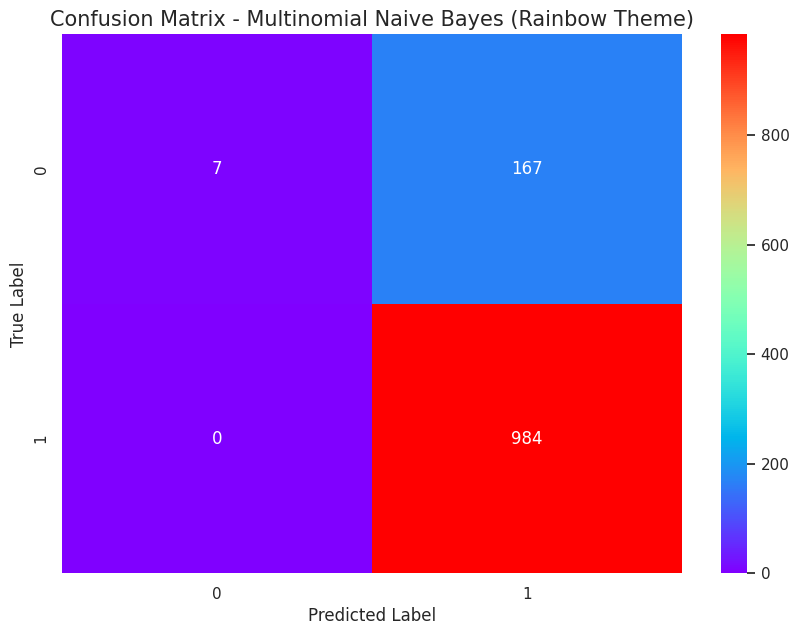

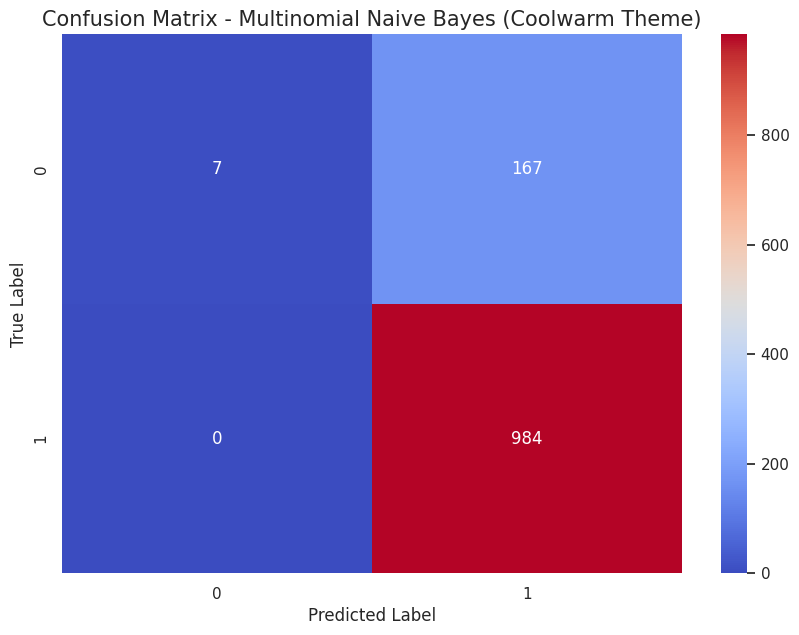

In [47]:
# Calculate the confusion matrix for Multinomial Naive Bayes
cm_nb = confusion_matrix(y_test, nb_predictions)

# Plot the confusion matrix with a rainbow color map for Multinomial Naive Bayes
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='rainbow')
plt.title('Confusion Matrix - Multinomial Naive Bayes (Rainbow Theme)', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# Plot the confusion matrix with a coolwarm color map for Multinomial Naive Bayes
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Multinomial Naive Bayes (Coolwarm Theme)', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


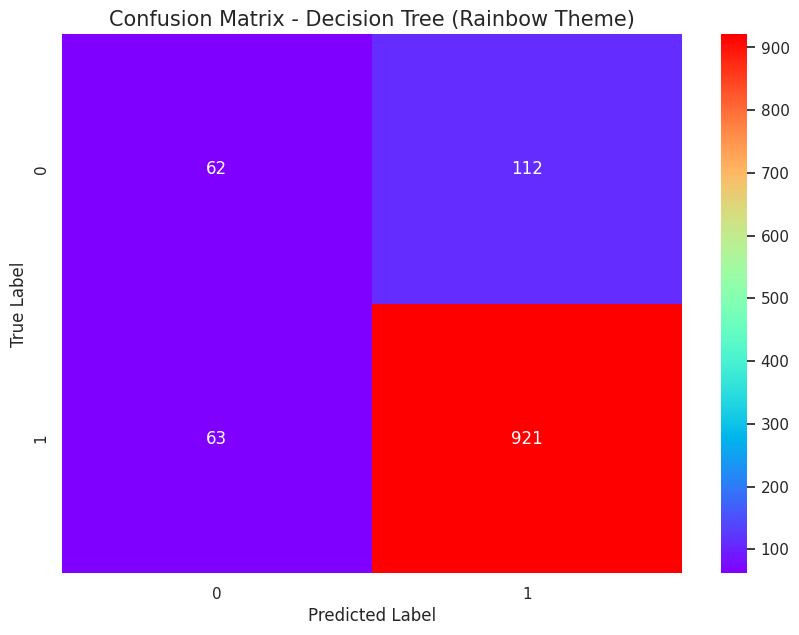

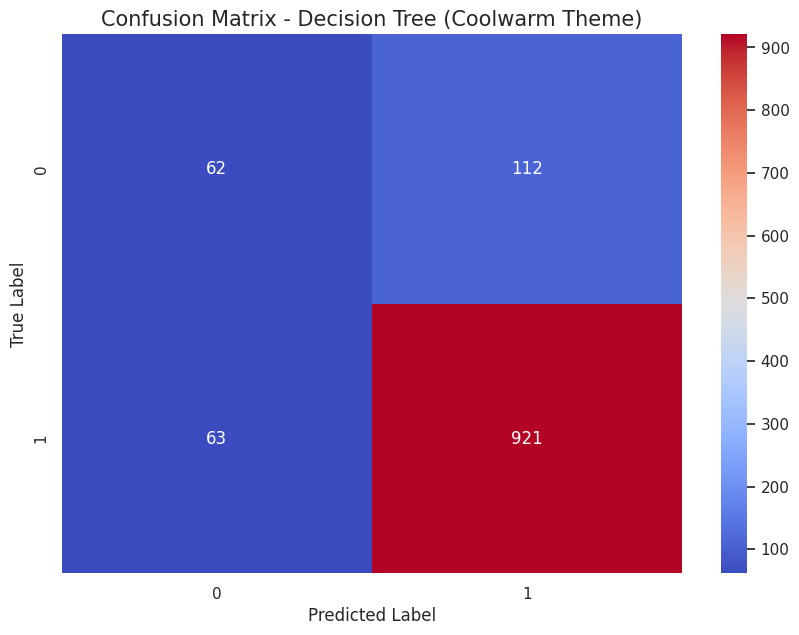

In [48]:
# Calculate the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)

# Plot the confusion matrix with a rainbow color map for Decision Tree
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='rainbow')
plt.title('Confusion Matrix - Decision Tree (Rainbow Theme)', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# Plot the confusion matrix with a coolwarm color map for Decision Tree
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Decision Tree (Coolwarm Theme)', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


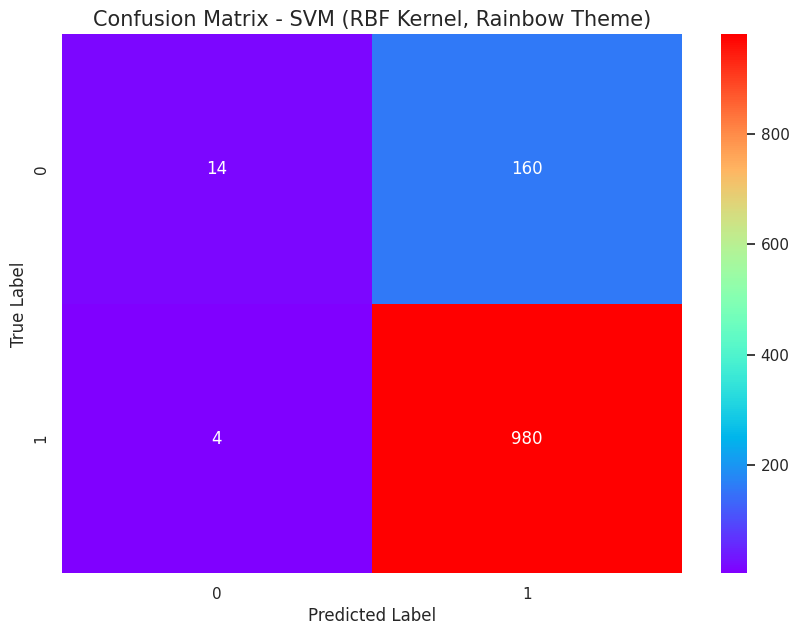

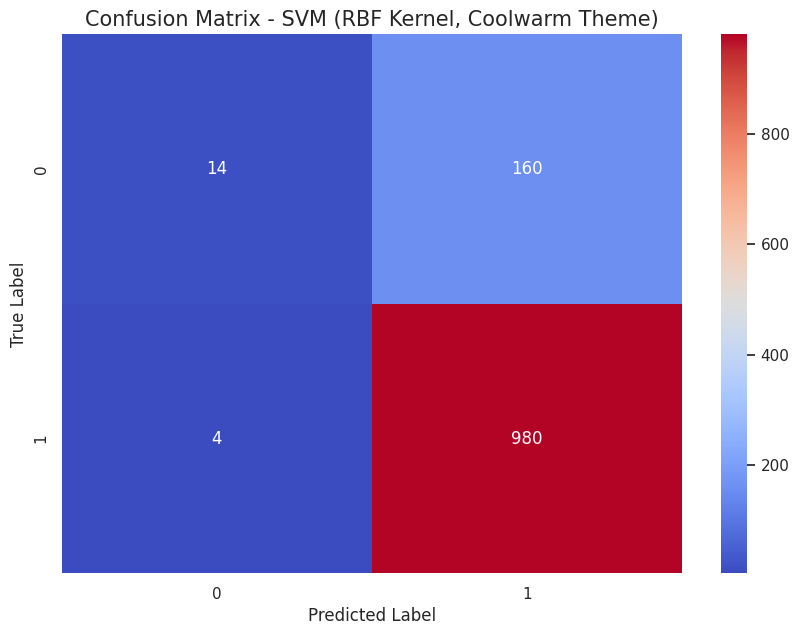

In [49]:
# Train Support Vector Machine (SVM) Classifier with RBF kernel
svm_rbf_model = SVC(kernel='rbf', random_state=42)
svm_rbf_model.fit(X_train, y_train)
svm_rbf_predictions = svm_rbf_model.predict(X_test)

# Calculate the confusion matrix for SVM with RBF kernel
cm_svm_rbf = confusion_matrix(y_test, svm_rbf_predictions)

# Plot the confusion matrix with a rainbow color map for SVM with RBF kernel
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm_rbf, annot=True, fmt='d', cmap='rainbow')
plt.title('Confusion Matrix - SVM (RBF Kernel, Rainbow Theme)', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# Plot the confusion matrix with a coolwarm color map for SVM with RBF kernel
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm_rbf, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - SVM (RBF Kernel, Coolwarm Theme)', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


<ipython-input-50-e2eebadb72cd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Toxic', y='Comments_Length', data=df, palette='coolwarm')


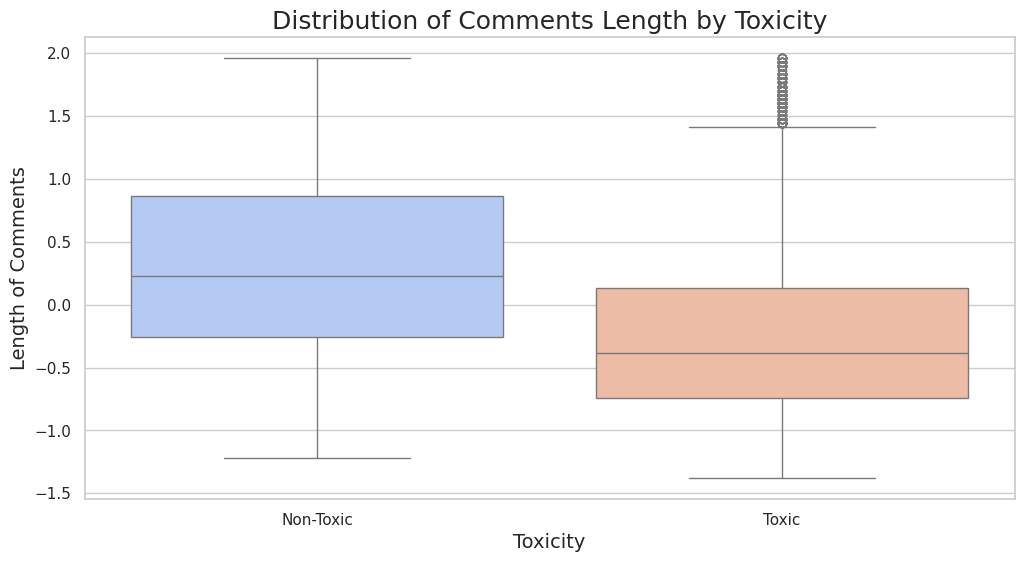

In [50]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create separate dataframes for toxic and non-toxic comments
df_toxic = df[df['Toxic'] == 1]
df_non_toxic = df[df['Toxic'] == 0]

# Plotting the distribution of the length of toxic and non-toxic comments using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Toxic', y='Comments_Length', data=df, palette='coolwarm')
plt.title('Distribution of Comments Length by Toxicity', fontsize=18)
plt.xlabel('Toxicity', fontsize=14)
plt.ylabel('Length of Comments', fontsize=14)
plt.xticks([0, 1], ['Non-Toxic', 'Toxic'])
plt.show()


In [51]:
# Count the number of toxic and non-toxic comments
toxic_count = df['Toxic'].sum()
non_toxic_count = len(df) - toxic_count  # Alternatively, count rows where 'Toxic' is 0

# Calculate the total number of comments
total_count = len(df)

# Calculate the percentage of toxic and non-toxic comments
toxic_percentage = (toxic_count / total_count) * 100
non_toxic_percentage = (non_toxic_count / total_count) * 100

# Display the counts and percentages
print(f"Toxic Comments: {toxic_count} ({toxic_percentage:.2f}%)")
print(f"Non-Toxic Comments: {non_toxic_count} ({non_toxic_percentage:.2f}%)")


Toxic Comments: 3356 (86.99%)
Non-Toxic Comments: 502 (13.01%)


                     Model  Accuracy  Precision    Recall  F1 Score
0  Multinomial Naive Bayes  0.855786   0.854909  1.000000  0.921780
1            Decision Tree  0.848877   0.891578  0.935976  0.913237
2         SVM (RBF Kernel)  0.858377   0.859649  0.995935  0.922787


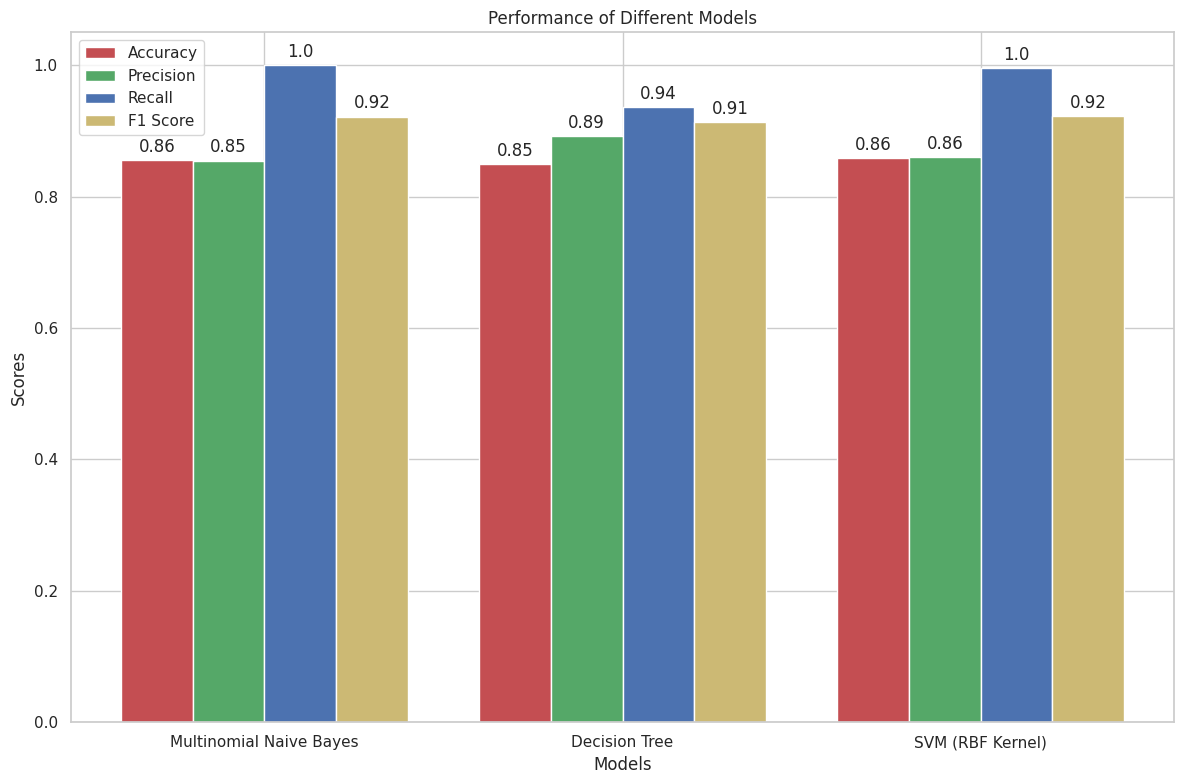

In [52]:
# Create a dataframe to display the results
results = {
    'Model': ['Multinomial Naive Bayes', 'Decision Tree', 'SVM (RBF Kernel)'],
    'Accuracy': [nb_accuracy, dt_accuracy, svm_rbf_accuracy],
    'Precision': [nb_precision, dt_precision, svm_rbf_precision],
    'Recall': [nb_recall, dt_recall, svm_rbf_recall],
    'F1 Score': [nb_f1, dt_f1, svm_rbf_f1]
}

results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plotting the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(results_df['Model']))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - 1.5*width, results_df['Accuracy'], width, label='Accuracy', color='r')
rects2 = ax.bar(x - 0.5*width, results_df['Precision'], width, label='Precision', color='g')
rects3 = ax.bar(x + 0.5*width, results_df['Recall'], width, label='Recall', color='b')
rects4 = ax.bar(x + 1.5*width, results_df['F1 Score'], width, label='F1 Score', color='y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'])
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


In [53]:
print("The End")

The End
